In [1]:
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
CONFIG_PATH = "/book_service/config/configuration.json"  # root is "tools"
def get_endpoint():
    try:
        cfile = open(f".{CONFIG_PATH}", "r")
    except OSError:
        try:
            cfile = open(f"..{CONFIG_PATH}", "r")
        except OSError:
            print("Configuration file not found!")
    with cfile:
        config = json.load(cfile)
        end_point = config["endpoint"]
        api_key = config["api_key"]
    return end_point, api_key

In [3]:
from bookdbtool.repl_tools import *
from bookdbtool.visualization_tools import running_total_comparison, yearly_comparisons

conf = get_endpoint()
bc = BC_Tool(*conf)

In [4]:
target_year = "2022"
bc.summary_books_read_by_year(target_year)

        
  YEAR   PAGES READ  BOOKS READ  
    
  2022   13498.0     39          



In [5]:
bc.MINIMAL_BOOK_INDEXES = [1,2,7,13]
bc.books_read_by_year(target_year)
dfl = bc.result

          
  TITLE                             AUTHOR                   PAGES  READDATE    
    
  The Code Breaker: Jennifer Doudn  Isaacson, Walter         500    2022-01-06  
  a, Gene Editing, and the Future                                               
  of the Human Race                                                             
  Godel, Escher, Bach               Hofstadter, Douglas R    776    2022-01-19  
  Turn the Ship Around!: A True St  Marquet, L. David        274    2022-01-19  
  ory of Turning Followers into Le                                              
  aders                                                                         
  Man's Search for Meaning          Frankl, Viktor E.        165    2022-01-23  
  Dine': A history of the navajos   Iverson, Peter           386    2022-01-24  
  Future Perfect: The Case For Pro  Johnson, Steven          272    2022-02-08  
  gress In A Networked Age                                                      
  Confession

In [6]:
dfl.style

,BookCollectionID,Title,Author,CopyrightDate,ISBNNumber,PublisherName,CoverType,Pages,Category,Note,Recycled,Location,ISBNNumber13,ReadDate
0,1600,"The Code Breaker: Jennifer Doudna, Gene Editing, and the Future of the Human Race","Isaacson, Walter",2021-01-01,1982115858,Simon and Shuster,Hard,500,None,Story of the characters that contributed to understanding cheap gene editing and revolutionize the opportunities for implementing our designs on our genetic futures.,0,Main Collection,9781982115852,2022-01-06
1,108,"Godel, Escher, Bach","Hofstadter, Douglas R",1979-01-01,0394756827,Vintage,Soft,776,Philosophy,Giant methodical work on incompleteness and computability. Weaving in Bach is fun and informative.,0,Main Collection,9780394756820,2022-01-19
2,1601,Turn the Ship Around!: A True Story of Turning Followers into Leaders,"Marquet, L. David",2013-01-01,B00AFPVP0Y,Portfolio,Soft,274,None,Recommended by Brian Maloney and someone else within a day or so of each other.,0,Main Collection,,2022-01-19
3,1602,Man's Search for Meaning,"Frankl, Viktor E.",1959-01-01,,Beacon Press,Soft,165,None,WWII concentration camp observations and philosophical framework for making sense and making meaning. Logos therapy.,0,Main Collection,9780807014271,2022-01-23
4,1353,Dine': A history of the navajos,"Iverson, Peter",2002-01-01,,University of New Mexico Press,Soft,386,None,"Museum Bookstore Santa Fe 2011-12. Started reading because Shelly got on a project to learn more about the Navajos, given our growing up near the reservation, and we exchanged books.",0,Main Collection,9780826327154,2022-01-24
5,1603,Future Perfect: The Case For Progress In A Networked Age,"Johnson, Steven",2012-01-01,,Riverhead Books,Digital,272,None,Steven tries to make sense of progress and sort out what progress can and ought to mean to us.,0,DOWNLOAD,9781594488207,2022-02-08
6,1604,Confessions of a Recovering Engineer: Transportation for a Strong Town,"Marohn Jr., Charles L.",2021-01-01,1119699290,Wiley,Hard,272,None,Tattered Cover. Recommended by Kurt in a Decisions conversation.,0,Main Collection,9781119699293,2022-02-22
7,1605,"Command and Control: Nuclear Weapons, the Damascus Accident, and the Illusion of Safety","Schlosser, Eric",2013-01-01,,Penguin Books,Soft,480,None,"Recommended by Andrew. Read as part of the Aspen Mesh book club. Julie hated it and skipped a lot of it, but others found it fascinating.",0,Main Collection,9780143125785,2022-02-23
8,1418,Love in the Time of Cholera,"Marquez, Gabriel Garcia",1988-01-01,,Vintage International,Soft,348,None,"Originally, I bought this for a Twitter talk about the cholera flag analogy at SXSW. The talk was not well attended (handful of people) in an auditorium for 100s.",0,Main Collection,9780307389732,2022-03-11
9,1200,"Madman Dreams of Turing Machines, A","Levin, Janna",2006-01-01,9781400032402,Anchor,Soft,230,None,Downloaded a talk by her about this book 2008-05-23. I reread this book without remembering one thing about having read it. I liked it very much in 2022. What happened the first time?,0,Main Collection,9781400032402,2022-03-18


In [7]:
dfl[["Pages"]].describe().style

,Pages
count,39.000000
mean,346.102564
std,117.138423
min,153.000000
25%,273.000000
50%,320.000000
75%,396.500000
max,776.000000


<Axes: xlabel='ReadDate'>

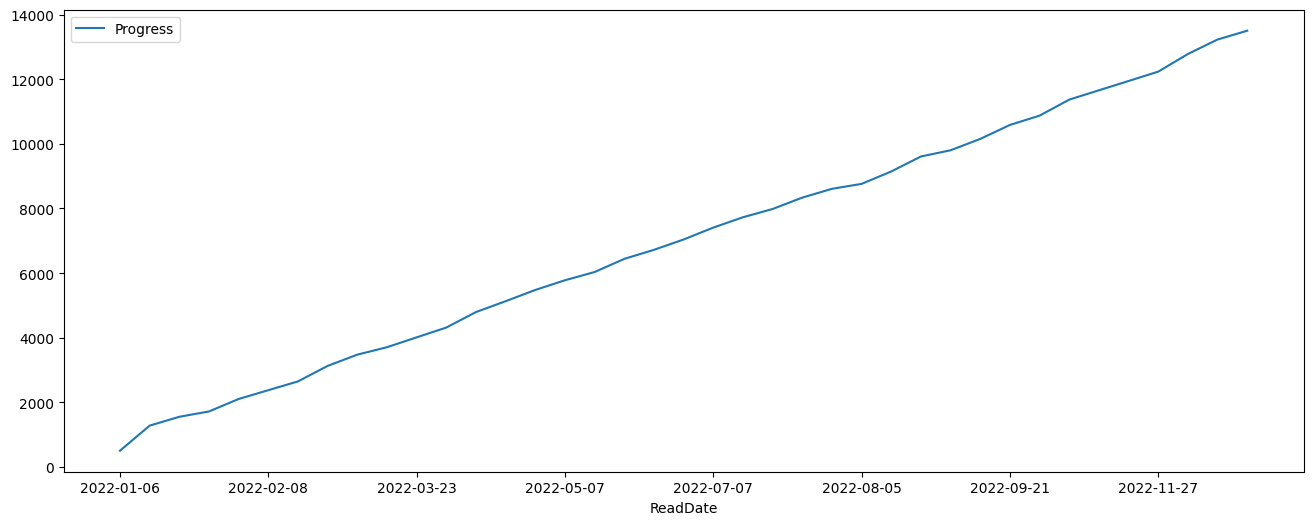

In [8]:
plot_size = [16,6]
dfl["Progress"] = dfl["Pages"].cumsum()
dfl.plot("ReadDate", "Progress", figsize=plot_size)

In [9]:
bc.summary_books_read_by_year()
df = bc.result
df["rank"] = df["pages read"].rank(ascending=False)
df.sort_values(by=["rank"], inplace=True)
df.reset_index()

        
  YEAR   PAGES READ  BOOKS READ  
    
  1966   2527.0      13          
  1984   1508.0      9           
  1985   2788.0      13          
  1986   3325.0      14          
  1987   3660.0      15          
  1988   4535.0      20          
  1989   5352.0      23          
  1990   2957.0      14          
  1991   4687.0      18          
  1992   2235.0      7           
  1993   4706.0      15          
  1994   4888.0      17          
  1995   4908.0      21          
  1996   5175.0      19          
  1997   2022.0      9           
  1998   5887.0      27          
  1999   7103.0      27          
  2000   6368.0      27          
  2001   6511.0      22          
  2002   6217.0      24          
  2003   9430.0      40          
  2004   6919.0      26          
  2005   10117.0     38          
  2006   7431.0      30          
  2007   9099.0      33          
  2008   8153.0      33          
  2009   8680.0      33          
  2010   11712.0     43          


,index,year,pages read,books read,rank
0,39,2022,13498.0,39,1.0
1,36,2019,12059.0,36,2.0
2,27,2010,11712.0,43,3.0
3,40,2023,11617.0,39,4.0
4,41,2024,11581.0,37,5.0
5,22,2005,10117.0,38,6.0
6,37,2020,9570.0,30,7.0
7,20,2003,9430.0,40,8.0
8,24,2007,9099.0,33,9.0
9,26,2009,8680.0,33,10.0


In [10]:
df.style

,year,pages read,books read,rank
39,2022,13498.000000,39,1.000000
36,2019,12059.000000,36,2.000000
27,2010,11712.000000,43,3.000000
40,2023,11617.000000,39,4.000000
41,2024,11581.000000,37,5.000000
22,2005,10117.000000,38,6.000000
37,2020,9570.000000,30,7.000000
20,2003,9430.000000,40,8.000000
24,2007,9099.000000,33,9.000000
26,2009,8680.000000,33,10.000000


In [11]:
df[["books read", "pages read"]].describe().style

,books read,pages read
count,43.000000,43.000000
mean,23.418605,6512.302326
std,9.442136,2952.121138
min,7.000000,1508.000000
25%,17.000000,4696.500000
50%,22.000000,6217.000000
75%,30.000000,8290.000000
max,43.000000,13498.000000


In [12]:
now = df.loc[df.year == int(target_year)]
print(now)

    year  pages read  books read  rank
39  2022     13498.0          39   1.0


/home/scott/Working/php_books_database/tools/bookdbtool/visualization_tools.py:34: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.axvline(x=int(now["pages read"]), color="red")


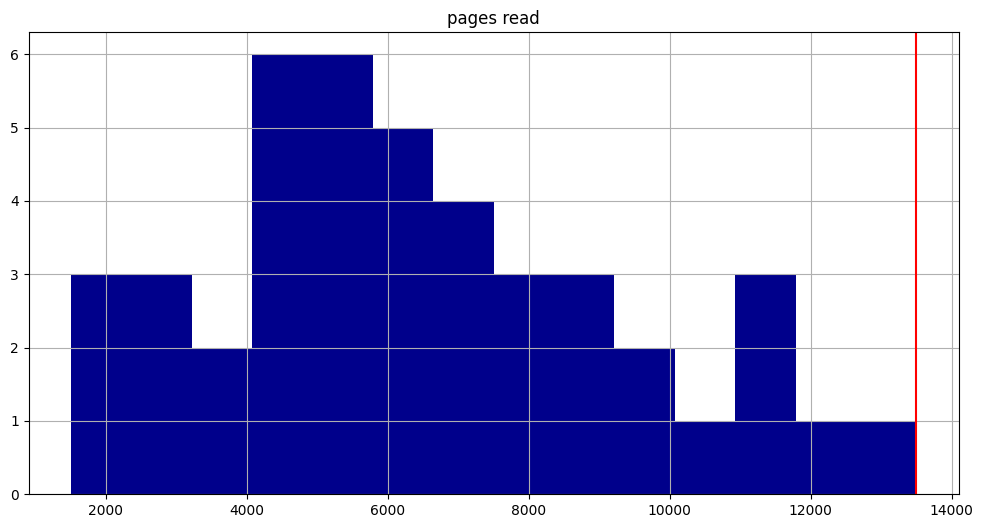

/home/scott/Working/php_books_database/tools/bookdbtool/visualization_tools.py:37: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.axvline(x=int(now["rank"]) - 1, color="red")


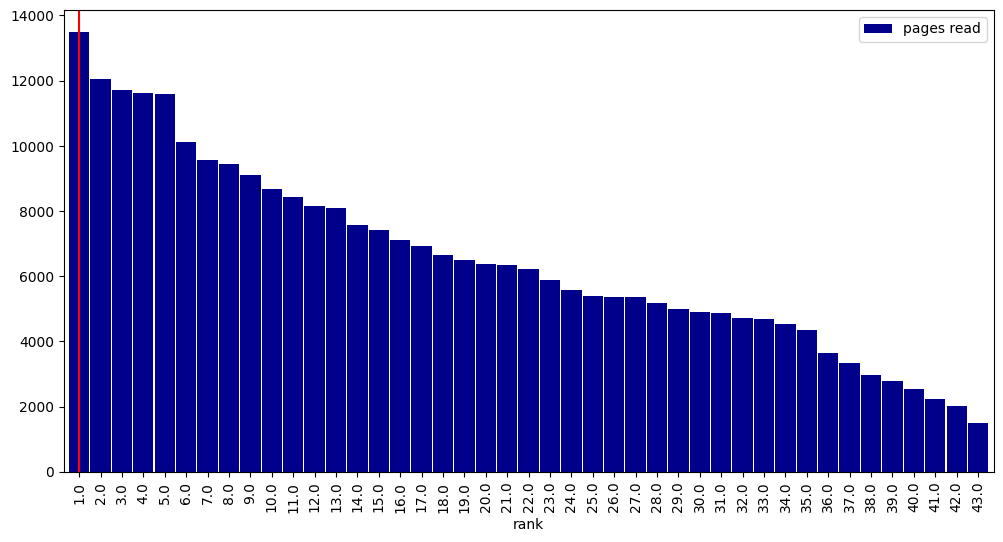

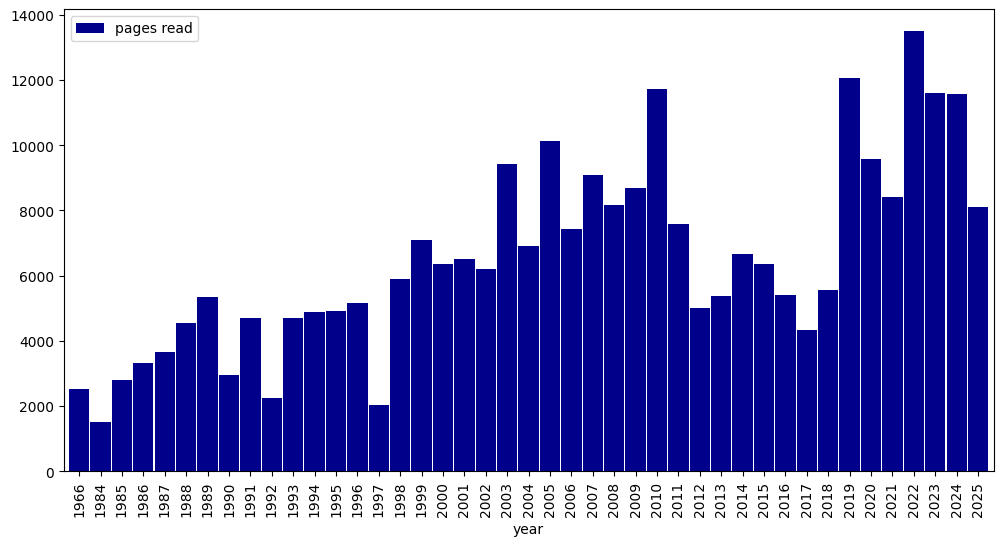

In [13]:
yearly_comparisons(df, int(target_year))

In [14]:
bc.books_read_by_year()
df = bc.result

          
  TITLE                        AUTHOR                       PAGES  READDATE    
    
  Letters To Children          Lewis, C S                   120    1966-05-25  
  Animal Farm                  Orwell, George               128    1966-05-25  
  Catcher in the Rye, The      Salinger, J D                214    1966-05-25  
  Franny and Zooey             Salinger, J D                202    1966-05-25  
  Travels With Charley         Steinbeck, John              275    1966-05-25  
  Tortilla Flat                Steinbeck, John              151    1966-05-25  
  Of Mice and Men              Steinbeck, John              270    1966-05-25  
  Pastures of Heaven, The      Steinbeck, John              243    1966-05-25  
  Russian Journal              Steinbeck, John              220    1966-05-25  
  Steps to Christ              White, E G                   89     1966-05-25  
  King's Equal, The            Paterson, Katherine ill. Va  64     1966-05-25  
                        

Return to continue; q to quit... q


In [15]:
df.style

,BookCollectionID,Title,Author,CopyrightDate,ISBNNumber,PublisherName,CoverType,Pages,Category,Note,Recycled,Location,ISBNNumber13,ReadDate
0,155,Letters To Children,"Lewis, C S",1985-01-01,0025708309,Macmillan,Hard,120,NonFiction,None,0,Main Collection,9780025708303,1966-05-25
1,212,Animal Farm,"Orwell, George",1946-01-01,0451519000,Signet,Soft,128,GenFiction,,1,Main Collection,9780451519009,1966-05-25
2,240,"Catcher in the Rye, The","Salinger, J D",1951-01-01,0553149660,Bantam,Soft,214,GenFiction,None,0,Main Collection,9780553149661,1966-05-25
3,241,Franny and Zooey,"Salinger, J D",1961-01-01,0553203487,Bantam,Soft,202,GenFiction,None,0,Main Collection,9780553203486,1966-05-25
4,253,Travels With Charley,"Steinbeck, John",1962-01-01,0140053204,Penguin,Soft,275,Travel,None,0,Main Collection,9780140053203,1966-05-25
5,254,Tortilla Flat,"Steinbeck, John",1935-01-01,0140042407,Penguin,Soft,151,GenFiction,None,0,Main Collection,9780140042405,1966-05-25
6,255,Of Mice and Men,"Steinbeck, John",1937-01-01,014004891X,Penguin,Soft,270,GenFiction,Includes Cannery Row,0,Main Collection,9780140048919,1966-05-25
7,257,"Pastures of Heaven, The","Steinbeck, John",1932-01-01,0140049983,Penguin,Soft,243,GenFiction,None,0,Main Collection,9780140049985,1966-05-25
8,265,Russian Journal,"Steinbeck, John",1948-01-01,1557782253,Athena,Soft,220,Travel,,1,Main Collection,9781557782250,1966-05-25
9,296,Steps to Christ,"White, E G",1971-01-01,None,Inspiration Books,Soft,89,Religion,None,0,Main Collection,None,1966-05-25


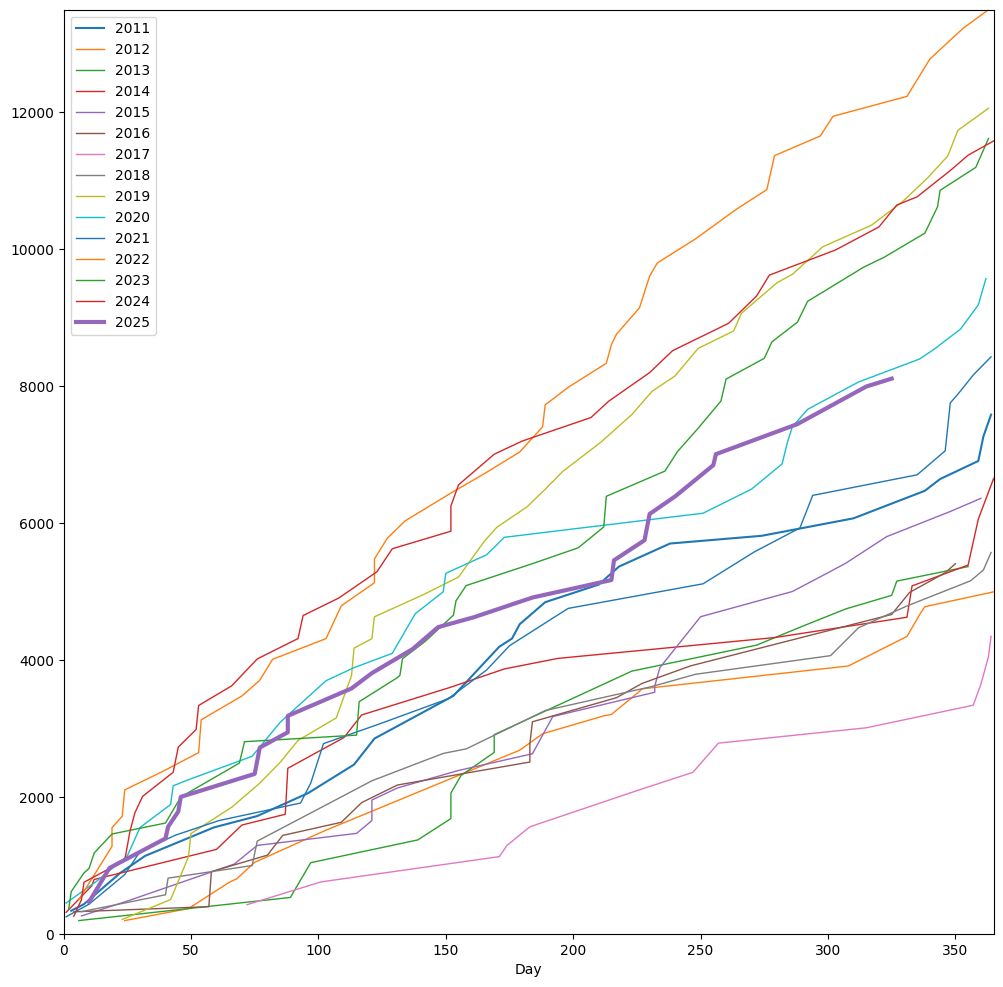

In [16]:
running_total_comparison(df, window=15)